In [7]:
import pandas as pd
import matplotlib.pyplot as plt


wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';')

In [38]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a,rat_cta
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.558274,1.288643,0.56,9.4,5,0.000000,0.384043,0.000000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.028261,-0.719933,0.68,9.8,5,0.000000,0.689796,0.000000
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.134264,-0.331177,0.65,9.8,5,0.004082,0.539796,0.004651
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.664277,-0.979104,0.58,9.8,6,0.057143,0.368367,0.046512
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.558274,1.288643,0.56,9.4,5,0.000000,0.384043,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,-0.978765,0.899886,0.58,10.5,5,0.007619,0.380952,0.011628
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,-0.862162,1.353436,0.76,11.2,6,0.008929,0.432143,0.015267
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,-0.533554,0.705508,0.75,11.0,6,0.011818,0.480909,0.018732
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,-0.676657,1.677400,0.71,10.2,5,0.011765,0.392157,0.018005


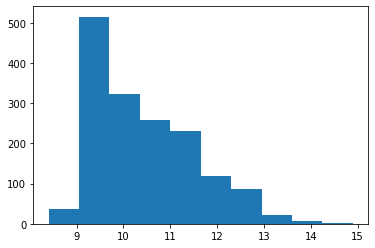

In [9]:
plt.figure()
plt.hist(wine["alcohol"],bins=10)
plt.show()

In [10]:
wine['rat_ca'] = wine['citric acid'] / wine['alcohol']

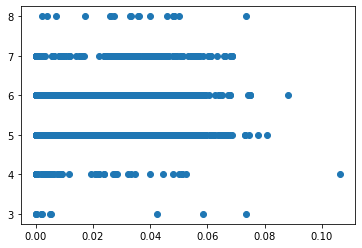

In [11]:
plt.figure()
plt.scatter(x = wine["rat_ca"],y = wine["quality"])
plt.show()

In [12]:

wine["rat_r2a"] = wine["residual sugar"] ** 2 / wine["alcohol"]


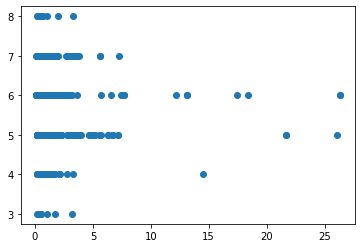

In [13]:

plt.figure()
plt.scatter(x = wine["rat_r2a"],y = wine["quality"])
plt.show()

In [14]:

wine ["rat_cta"] = wine["citric acid"] / (wine["citric acid"] + wine["volatile acidity"] + wine["fixed acidity"])

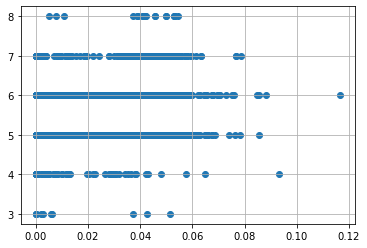

In [15]:

plt.figure()
plt.scatter(x = wine["rat_cta"],y = wine["quality"])
plt.grid()
plt.show()


In [16]:
import numpy as np # 넘파이 쓰는거 말고 다른 방법도 있을듯
wine['density'] = (wine['density']-np.mean(wine['density'])) / np.std(wine['density'])
wine['pH'] = (wine['pH']-np.mean(wine['pH'])) / np.std(wine['pH'])


In [17]:

from sklearn.model_selection import train_test_split
x = wine.drop('quality',axis = 1).values
y = wine['quality'].values
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.9, test_size = 0.1, stratify = y, random_state = 2021 )



In [18]:
x_train, x_valid, y_train,y_valid = train_test_split(x_train, y_train, train_size = 0.8, test_size = 0.1, stratify = y_train, random_state = 2021 )


In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forests = []
for i in range(1,51):
    rfc=RandomForestClassifier(n_estimators=i, max_depth=13,min_samples_leaf = 5, random_state = 30)
    forests.append(rfc.fit(x_train, y_train))

In [20]:
accs = []
for i in range(50):
    pred = forests[i].predict(x_valid)
    acc = accuracy_score(pred, y_valid)
    print("정확도: ", acc)
    accs.append(acc)


정확도:  0.5138888888888888
정확도:  0.5625
정확도:  0.5347222222222222
정확도:  0.5416666666666666
정확도:  0.5763888888888888
정확도:  0.5833333333333334
정확도:  0.6041666666666666
정확도:  0.5833333333333334
정확도:  0.6041666666666666
정확도:  0.5763888888888888
정확도:  0.6041666666666666
정확도:  0.6319444444444444
정확도:  0.6319444444444444
정확도:  0.6319444444444444
정확도:  0.6180555555555556
정확도:  0.6319444444444444
정확도:  0.6319444444444444
정확도:  0.625
정확도:  0.6458333333333334
정확도:  0.6319444444444444
정확도:  0.6388888888888888
정확도:  0.6388888888888888
정확도:  0.6319444444444444
정확도:  0.625
정확도:  0.625
정확도:  0.6527777777777778
정확도:  0.6458333333333334
정확도:  0.6527777777777778
정확도:  0.6527777777777778
정확도:  0.6527777777777778
정확도:  0.6527777777777778
정확도:  0.6597222222222222
정확도:  0.6597222222222222
정확도:  0.6527777777777778
정확도:  0.6597222222222222
정확도:  0.6597222222222222
정확도:  0.6597222222222222
정확도:  0.6597222222222222
정확도:  0.6666666666666666
정확도:  0.6527777777777778
정확도:  0.6597222222222222
정확도:  0.6458333333333334
정

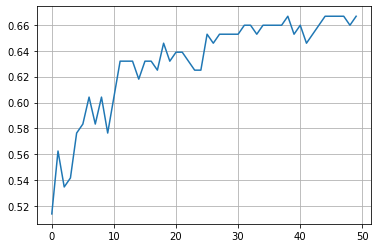

In [21]:

plt.figure()
plt.plot(accs)
plt.grid()
plt.show()


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# ### **Q17. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
# * **
# - Tensorflow framework를 사용한다.
# - 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
#     * 2개의 fully connected layer를 사용할 것, 노드는 인풋레이어 노드의 2이상으로 한다.
# - Early stopping을 이용하여, validation loss가 50번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
# - 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
# - y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
#     * 데이터에 없는 클래스까지 고려하여, 아웃풋레이어의 노드를 10개로 지정한다.
# - epochs는 2000번을 지정한다.
# ---

# In[88]:


In [71]:
import os
#from keras.optimizers import Adam
from keras.optimizer_v2.adam import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()


model.add(Dense(16, activation='relu', input_shape=(2,14)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
model.compile(loss='mse', optimizer='Adam', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)



checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                save_best_only=True)
history = model.fit(x_train, y_train, epochs=2000,  

                  verbose=2, validation_split=0.3,   

                 callbacks=[es,cp_callback])

model.load_weights(checkpoint_path)

Epoch 1/2000
29/29 - 0s - loss: 30.8780 - acc: 0.0207 - val_loss: 32.9837 - val_acc: 0.0433

Epoch 00001: val_loss improved from inf to 32.98370, saving model to training_1\cp.ckpt
Epoch 2/2000
29/29 - 0s - loss: 30.8677 - acc: 0.0522 - val_loss: 32.9814 - val_acc: 0.0476

Epoch 00002: val_loss improved from 32.98370 to 32.98143, saving model to training_1\cp.ckpt
Epoch 3/2000
29/29 - 0s - loss: 30.8666 - acc: 0.0554 - val_loss: 32.9809 - val_acc: 0.0693

Epoch 00003: val_loss improved from 32.98143 to 32.98087, saving model to training_1\cp.ckpt
Epoch 4/2000
29/29 - 0s - loss: 30.8661 - acc: 0.0652 - val_loss: 32.9803 - val_acc: 0.0736

Epoch 00004: val_loss improved from 32.98087 to 32.98028, saving model to training_1\cp.ckpt
Epoch 5/2000
29/29 - 0s - loss: 30.8656 - acc: 0.1598 - val_loss: 32.9800 - val_acc: 0.2078

Epoch 00005: val_loss improved from 32.98028 to 32.98005, saving model to training_1\cp.ckpt
Epoch 6/2000
29/29 - 0s - loss: 30.8655 - acc: 0.1457 - val_loss: 32.9799 -


Epoch 00043: val_loss did not improve from 32.97971
Epoch 44/2000
29/29 - 0s - loss: 30.8652 - acc: 0.1076 - val_loss: 32.9797 - val_acc: 0.1212

Epoch 00044: val_loss did not improve from 32.97971
Epoch 45/2000
29/29 - 0s - loss: 30.8652 - acc: 0.1000 - val_loss: 32.9797 - val_acc: 0.1212

Epoch 00045: val_loss did not improve from 32.97971
Epoch 46/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0957 - val_loss: 32.9797 - val_acc: 0.0823

Epoch 00046: val_loss improved from 32.97971 to 32.97971, saving model to training_1\cp.ckpt
Epoch 47/2000
29/29 - 0s - loss: 30.8652 - acc: 0.1098 - val_loss: 32.9797 - val_acc: 0.0736

Epoch 00047: val_loss did not improve from 32.97971
Epoch 48/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0880 - val_loss: 32.9797 - val_acc: 0.1039

Epoch 00048: val_loss improved from 32.97971 to 32.97971, saving model to training_1\cp.ckpt
Epoch 49/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0957 - val_loss: 32.9797 - val_acc: 0.0693

Epoch 00049: val_loss did not improve fro


Epoch 00099: val_loss did not improve from 32.97970
Epoch 100/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0848 - val_loss: 32.9797 - val_acc: 0.0779

Epoch 00100: val_loss did not improve from 32.97970
Epoch 101/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0652 - val_loss: 32.9797 - val_acc: 0.0779

Epoch 00101: val_loss did not improve from 32.97970
Epoch 102/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0576 - val_loss: 32.9797 - val_acc: 0.0606

Epoch 00102: val_loss did not improve from 32.97970
Epoch 103/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0685 - val_loss: 32.9797 - val_acc: 0.0736

Epoch 00103: val_loss did not improve from 32.97970
Epoch 104/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0728 - val_loss: 32.9797 - val_acc: 0.1169

Epoch 00104: val_loss did not improve from 32.97970
Epoch 105/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0772 - val_loss: 32.9797 - val_acc: 0.0519

Epoch 00105: val_loss did not improve from 32.97970
Epoch 106/2000
29/29 - 0s - loss: 30.8652 - acc: 0.0989 - val_los

In [60]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,8.3,0.600,0.25,2.2,0.118,9.0,38.0,-0.310948,-1.043897,0.53,9.8,0.025510,0.493878,0.027322
1,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.240266,-1.238276,1.02,9.3,0.052688,0.430108,0.049000
2,6.4,0.380,0.14,2.2,0.038,15.0,25.0,-0.851562,0.835093,0.65,11.1,0.012613,0.436036,0.020231
3,12.8,0.615,0.66,5.8,0.083,7.0,42.0,2.890335,-1.562239,0.73,10.0,0.066000,3.364000,0.046892
4,10.2,0.540,0.37,15.4,0.214,55.0,95.0,3.680055,-0.849519,0.77,9.0,0.041111,26.351111,0.033303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,6.1,0.380,0.15,1.8,0.072,6.0,19.0,-0.660757,0.705508,0.57,9.4,0.015957,0.344681,0.022624
1147,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.187265,-1.043897,0.74,9.2,0.028261,0.314130,0.026749
1148,11.8,0.330,0.49,3.4,0.093,54.0,80.0,1.830307,-0.072005,0.76,10.7,0.045794,1.080374,0.038827
1149,9.9,0.540,0.45,2.3,0.071,16.0,40.0,1.247292,0.511130,0.62,9.4,0.047872,0.562766,0.041322


In [ ]:
# ### **Q20. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시오.**
# * **
# - 필요한 라이브러리가 있다면 따로 불러온다.
# - epochs에 따른 accuracy의 변화를 시각화 한다.
# - train accuracy와 validation accuracy를 전부 시각화하고, 구별가능해야 한다.
# - 그래프의 타이틀은 'Accuracy'로 표시한다.
# - x축에는 'epochs'라고 표시하고 y축에는 'accuracy'라고 표시한다.
# ---

# In[28]:


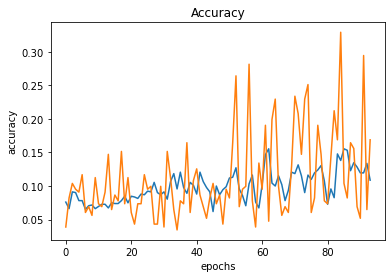

In [70]:
h = history
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.show()